# Mean/Covariance of a data set and effect of linear transformation

In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
from sklearn.datasets import fetch_lfw_people, fetch_olivetti_faces
import time
import timeit

In [2]:
%matplotlib inline
from ipywidgets import interact

In [3]:
import numpy.testing as npt

## Data

The data set is taken from the Coursera "Mathematics for Machine Learning" wk1 assignment 

In [4]:
X_test = np.arange(6).reshape(2,3)
expected_test_mean = np.array([1., 4.]).reshape(-1, 1)
expected_test_cov = np.array([[2/3., 2/3.], [2/3.,2/3.]])
print('X:\n', X_test)
print('Expected mean:\n', expected_test_mean)
print('Expected covariance:\n', expected_test_cov)

X:
 [[0 1 2]
 [3 4 5]]
Expected mean:
 [[1.]
 [4.]]
Expected covariance:
 [[0.66666667 0.66666667]
 [0.66666667 0.66666667]]


The data set has 2 dimensions (D=2) and 3 observations (N=3)

In [5]:
D, N = X_test.shape
D,N

(2, 3)

##  Mean and Variance Functions

In [6]:
def mean_naive(X):
    D, N = X.shape
    mean = np.zeros((D,1))
    for n in range(N):
        for m in range(D):
            mean[m] = mean[m]+ X[m,n]
    mean = mean / N
    return mean

def mean(X):
    D, N = X.shape
    mean = np.zeros((D,1))
    mean_temp = np.mean(X,1)
    for m in range(D):  #loop to create a list of lists
        mean[m] = mean_temp[m]
    return mean

def cov_naive(X):
    D, N = X.shape
    covariance = np.zeros((D, D))    
    mean = np.mean(X,axis=1)
    
    for n in range(N):
        diff = np.asmatrix(X[:,n] - mean)
        covariance += diff.T @ diff 
    covariance = covariance/N
    return covariance


def cov(X):
    D, N = X.shape
    covariance_matrix = np.zeros((D, D))
    covariance_matrix = np.cov(X, rowvar=True, bias=True)
    return covariance_matrix

Testing the data set as in the assignment

In [7]:
print('X:\n', X_test)
print('Expected mean:\n', expected_test_mean)
print('Expected covariance:\n', expected_test_cov)
print('Calculated mean naive:\n', mean_naive(X_test))
print('Calculated mean np:\n', mean(X_test))
print('Calculated covariance naive:\n', cov_naive(X_test))
print('Calculated covariance np:\n', cov(X_test))


print('Difference between mean_naive:\n',np.testing.assert_almost_equal(mean_naive(X_test), expected_test_mean))
print('Difference between mean_np:\n',np.testing.assert_almost_equal(mean(X_test), expected_test_mean))

print('Difference between var_np:\n',np.testing.assert_almost_equal(cov(X_test), expected_test_cov))
print('Difference between var_naive:\n',np.testing.assert_almost_equal(cov_naive(X_test), expected_test_cov))

X:
 [[0 1 2]
 [3 4 5]]
Expected mean:
 [[1.]
 [4.]]
Expected covariance:
 [[0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Calculated mean naive:
 [[1.]
 [4.]]
Calculated mean np:
 [[1.]
 [4.]]
Calculated covariance naive:
 [[0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Calculated covariance np:
 [[0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Difference between mean_naive:
 None
Difference between mean_np:
 None
Difference between var_np:
 None
Difference between var_naive:
 None


## Mean and Variance of Images

Let's test the mean and variance functions on the Olivetti data set

In [8]:
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces('./')
faces = dataset.data.T

print('Shape of the faces dataset: {}'.format(faces.shape))
print('{} data points'.format(faces.shape[1]))

Shape of the faces dataset: (4096, 400)
400 data points


These are the images of all faces in the dataset

In [9]:
def show_face(face):
    plt.figure()
    plt.imshow(face.reshape((64, 64)), cmap='gray')
    plt.show()

In [10]:
@interact(n=(0, faces.shape[1]-1))
def display_faces(n=0):
    plt.figure()
    plt.imshow(faces[:,n].reshape((64, 64)), cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=0, description='n', max=399), Output()), _dom_classes=('widget-interact'…

Using our defined mean function we can calculate a mean face and plot it

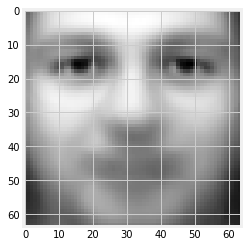

In [11]:
meanface=mean(faces)
meanface =meanface.reshape((64,64))
plt.imshow(meanface, cmap='gray');

Using our define variance function we can calculate a variance face and plot it

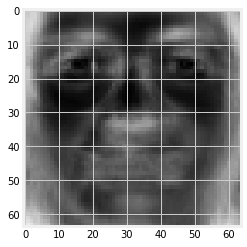

In [12]:
varface = np.var(faces, axis=1, ddof=1)
varface =varface.reshape((64,64))
plt.imshow(varface, cmap='gray');